In [1]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l


$y=1.2x-3.4x^2+5.6x^3+5+\epsilon$

In [24]:
n_train, n_test, true_w, true_b = 100, 100, [1.2,-3.4,5.6] , 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
labels = (true_w[0]*poly_features[ : ,0] + true_w[1]*poly_features[ : ,1] + true_w[2]*poly_features[ : ,2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [25]:
features[ :2] ,poly_features[ :2], labels[ :2]

(tensor([[-2.1670],
         [ 0.9951]]), tensor([[ -2.1670,   4.6958, -10.1757],
         [  0.9951,   0.9903,   0.9855]]), tensor([-70.5323,   8.3569]))

In [26]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals =None, y2_vals=None, legend=None, figsize=(3.2, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [27]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    batch_size = min(10, train_labels.shape[0])
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('Final epoch: train loss ', train_ls[-1], 'test loss ', test_ls[-1])
    semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'loss', range(1, num_epochs+1), test_ls, ['train', 'test'])
    print('weigth: ', net.weight.data, '\nbias: ', net.bias.data)

Final epoch: train loss  0.00026308291126042604 test loss  0.00046175182797014713
weigth:  tensor([[ 1.1828, -3.3904,  5.6072]]) 
bias:  tensor([4.9916])


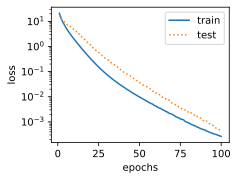

In [30]:
fit_and_plot(poly_features[ :n_train, : ], poly_features[n_train: , : ], labels[ :n_train], labels[n_train: ])

Final epoch: train loss  127.935546875 test loss  114.68499755859375
weigth:  tensor([[15.4804]]) 
bias:  tensor([2.3331])


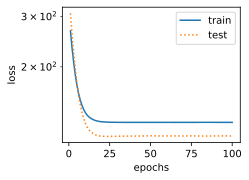

In [29]:
fit_and_plot(features[ :n_train, : ], features[n_train: , : ], labels[ :n_train], labels[n_train: ])

Final epoch: train loss  0.009171707555651665 test loss  18.9266300201416
weigth:  tensor([[ 2.9576, -1.1513,  5.8365]]) 
bias:  tensor([0.6670])


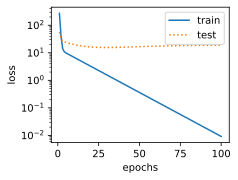

In [31]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])
